# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [4]:
cities[0:][0:]

['saskylakh',
 'sidney',
 'gushikawa',
 'grand-lahou',
 'fortuna',
 'mount gambier',
 'tabiauea',
 'kisangani',
 'bredasdorp',
 'krk',
 'punta arenas',
 'asosa',
 'khatanga',
 'kaeo',
 'flinders',
 'nuuk',
 'thompson',
 'cape town',
 'saint-philippe',
 'sorvag',
 'tazovskiy',
 'klaksvik',
 'rikitea',
 'nemuro',
 'othonoi',
 'illoqqortoormiut',
 'shingu',
 'georgetown',
 'lavrentiya',
 'doha',
 'soyo',
 'upernavik',
 'bethel',
 'mataura',
 'muravlenko',
 'ruteng',
 'yellowknife',
 'albany',
 'tsihombe',
 'tocache',
 'ponta do sol',
 'chiang klang',
 'new norfolk',
 'azimur',
 'berlevag',
 'tessalit',
 'puerto ayora',
 'narsaq',
 'mahanoro',
 'victor harbor',
 'ngunguru',
 'jamestown',
 'lolua',
 'mayo',
 'belushya guba',
 'gravdal',
 'lulea',
 'hermanus',
 'vaini',
 'port alfred',
 'carnarvon',
 'tuktoyaktuk',
 'ribeira grande',
 'mar del plata',
 'ushuaia',
 'port-gentil',
 'torbay',
 'aswan',
 'lebu',
 'hilo',
 'xingyi',
 'vestmannaeyjar',
 'busselton',
 'saleaula',
 'hithadhoo',
 'ke

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
def getURL(city):
    # Build and return the URL for the weather API request
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    #return completed URL
    return query_url

print("Beginning Data Retrieval")
rec_count = 0
city_info1 = pd.DataFrame({"City":[], "Cloudiness":[], "Country":[], "Date":[], "Humidity":[], "Lat":[], 
                           "Lng":[], "Max":[], "Temp":[], "Wind Speed":[]})

for city in cities:
    rec_count += 1
    try:
        result = requests.get(getURL(city)).json()
        print(f"Processing Record {rec_count} of {len(cities)} | {city}")
        newdf = pd.DataFrame([[result["name"], result["clouds"]["all"], result["sys"]["country"], result["dt"],
                          result["main"]["humidity"], result["coord"]["lat"], result["coord"]["lon"], 
                          result["main"]["temp_max"], result["main"]["temp"], result["wind"]["speed"]]],
                            columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", 
                               "Lng", "Max", "Temp", "Wind Speed"])
        city_info1 = city_info1.append(newdf)

    except KeyError:
        print("API Retrieval Error")
        continue





Beginning Data Retrieval
Processing Record 1 of 609 | saskylakh
Processing Record 2 of 609 | sidney
Processing Record 3 of 609 | gushikawa
Processing Record 4 of 609 | grand-lahou
Processing Record 5 of 609 | fortuna
Processing Record 6 of 609 | mount gambier
Processing Record 7 of 609 | tabiauea
Error
Processing Record 8 of 609 | kisangani
Processing Record 9 of 609 | bredasdorp
Processing Record 10 of 609 | krk
Processing Record 11 of 609 | punta arenas
Processing Record 12 of 609 | asosa
Processing Record 13 of 609 | khatanga
Processing Record 14 of 609 | kaeo
Processing Record 15 of 609 | flinders
Processing Record 16 of 609 | nuuk
Processing Record 17 of 609 | thompson
Processing Record 18 of 609 | cape town
Processing Record 19 of 609 | saint-philippe
Processing Record 20 of 609 | sorvag
Error
Processing Record 21 of 609 | tazovskiy
Processing Record 22 of 609 | klaksvik
Processing Record 23 of 609 | rikitea
Processing Record 24 of 609 | nemuro
Processing Record 25 of 609 | othon

Processing Record 203 of 609 | qaanaaq
Processing Record 204 of 609 | port hedland
Processing Record 205 of 609 | kihei
Processing Record 206 of 609 | bardiyah
Error
Processing Record 207 of 609 | sibu
Processing Record 208 of 609 | bar harbor
Processing Record 209 of 609 | buraydah
Processing Record 210 of 609 | kempsey
Processing Record 211 of 609 | iquitos
Processing Record 212 of 609 | codrington
Processing Record 213 of 609 | aketi
Processing Record 214 of 609 | buala
Processing Record 215 of 609 | lerik
Processing Record 216 of 609 | mys shmidta
Error
Processing Record 217 of 609 | talnakh
Processing Record 218 of 609 | nha trang
Processing Record 219 of 609 | laguna de perlas
Processing Record 220 of 609 | mackay
Processing Record 221 of 609 | nome
Processing Record 222 of 609 | luan
Processing Record 223 of 609 | cidreira
Processing Record 224 of 609 | college
Processing Record 225 of 609 | hasaki
Processing Record 226 of 609 | lompoc
Processing Record 227 of 609 | sumbe
Proces

Processing Record 407 of 609 | hay river
Processing Record 408 of 609 | merauke
Processing Record 409 of 609 | okrika
Processing Record 410 of 609 | nosy varika
Processing Record 411 of 609 | myitkyina
Processing Record 412 of 609 | chor
Processing Record 413 of 609 | laurel
Processing Record 414 of 609 | anloga
Processing Record 415 of 609 | edd
Processing Record 416 of 609 | broken hill
Processing Record 417 of 609 | yar-sale
Processing Record 418 of 609 | pacific grove
Processing Record 419 of 609 | karpathos
Processing Record 420 of 609 | eyrarbakki
Processing Record 421 of 609 | san quintin
Processing Record 422 of 609 | jasper
Processing Record 423 of 609 | nouadhibou
Processing Record 424 of 609 | alofi
Processing Record 425 of 609 | ukiah
Processing Record 426 of 609 | fort nelson
Processing Record 427 of 609 | paamiut
Processing Record 428 of 609 | bhag
Processing Record 429 of 609 | bowen
Processing Record 430 of 609 | christchurch
Processing Record 431 of 609 | santa cruz
Pr

Processing Record 608 of 609 | burkhala
Error
Processing Record 609 of 609 | tagusao


In [53]:
city_info1.to_csv("selected 200 cities.csv")
city_info1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max,Temp,Wind Speed
0,Saskylakh,88.0,RU,1.538550e+09,93.0,71.97,114.09,28.62,28.62,4.61
0,Sidney,90.0,US,1.538547e+09,93.0,47.72,-104.16,39.20,37.89,10.29
0,Gushikawa,90.0,JP,1.538546e+09,79.0,26.35,127.87,77.00,76.46,17.22
0,Grand-Lahou,44.0,CI,1.538550e+09,95.0,5.24,-5.00,72.09,72.09,3.04
0,Fortuna,0.0,ES,1.538548e+09,72.0,38.18,-1.13,62.60,58.93,2.24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

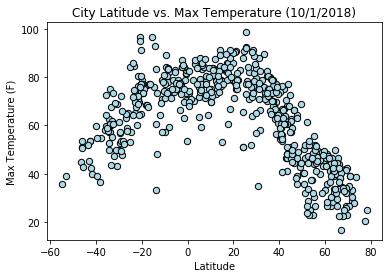

In [55]:
city_info1.plot.scatter(x="Lat", y="Max", c="LightBlue", s=40, edgecolor="Black")
plt.title("City Latitude vs. Max Temperature (10/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("lat vs max temp.png")



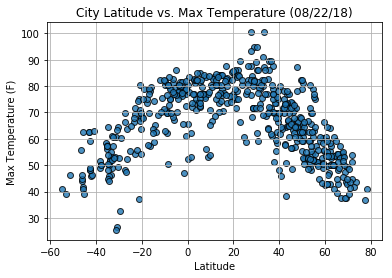

#### Latitude vs. Humidity Plot

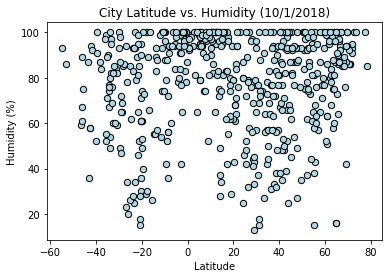

In [58]:
city_info1.plot.scatter(x="Lat", y="Humidity", c="LightBlue", s=40, edgecolor="Black")
plt.title("City Latitude vs. Humidity (10/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat vs humidity.png")



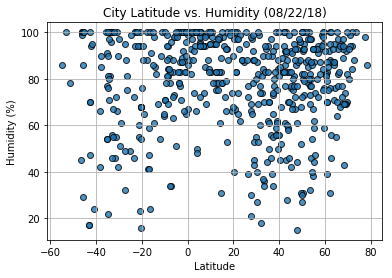

#### Latitude vs. Cloudiness Plot

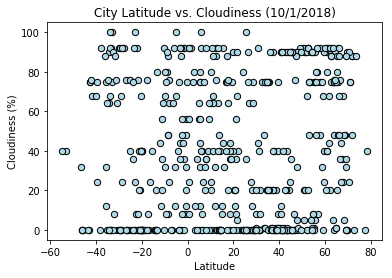

In [59]:
city_info1.plot.scatter(x="Lat", y="Cloudiness", c="LightBlue", s=40, edgecolor="Black")
plt.title("City Latitude vs. Cloudiness (10/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat vs cloudiness.png")

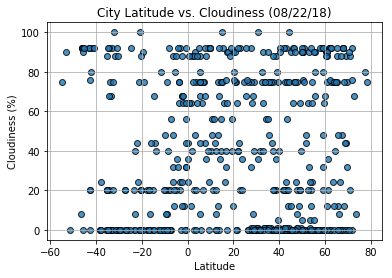

#### Latitude vs. Wind Speed Plot

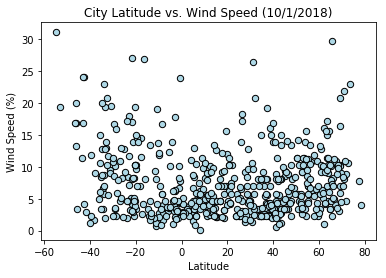

In [60]:
city_info1.plot.scatter(x="Lat", y="Wind Speed", c="LightBlue", s=40, edgecolor="Black")
plt.title("City Latitude vs. Wind Speed (10/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.savefig("lat vs wind speed.png")

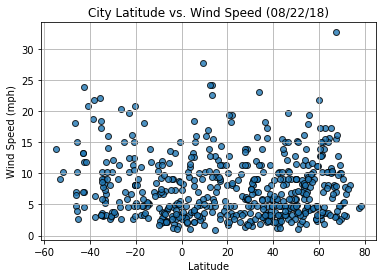